# NCAR EdEc Bootcamp, Lesson 1

## Python Imports

In [1]:
import pandas as pd
import numpy as np

# Dataset
from palmerpenguins import load_penguins

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
import sklearn

In [2]:
print('scikit-learn version:', sklearn.__version__)

scikit-learn version: 1.3.0


## Dataset Loading

In [3]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


<Axes: >

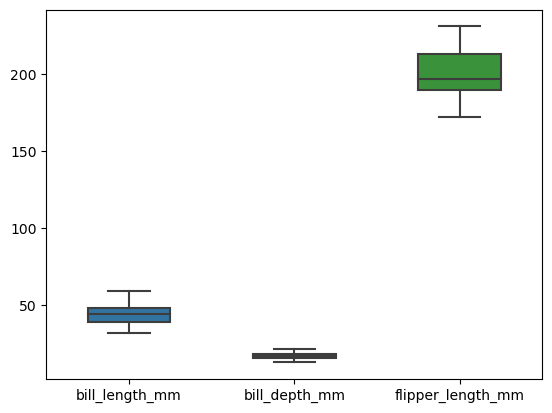

In [5]:
sns.boxplot(data=df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']], width=0.5,fliersize=5)

Correlation:


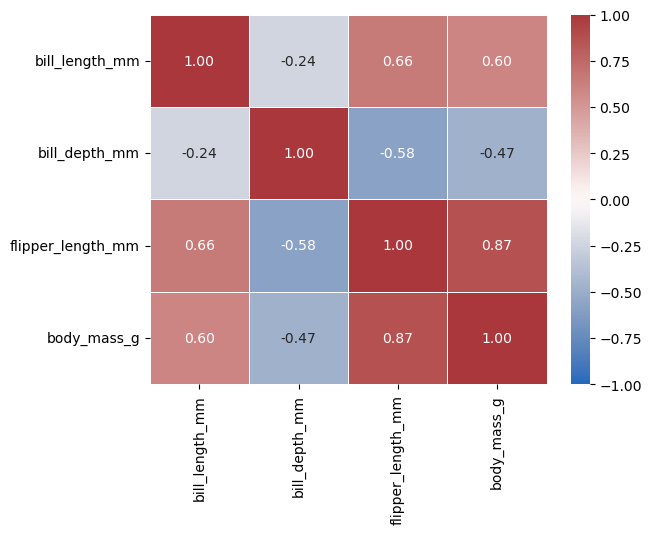

In [6]:
print('Correlation:')
sns.heatmap(df.select_dtypes(include=['float64']).corr(),
           annot=True,
           fmt=".2f",
           linewidth=.5,
           cmap="vlag",
           vmin=-1, vmax=1);

In [7]:
df[df.species == "Adelie"].year.nunique()

3

Year is not correlated to penguins, so let's drop it!

In [8]:
df = df.drop(['year'], axis=1)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


We can also get a count of all the nans in the dataset:

df.isna().sum()

In [9]:
df = df.dropna() # this drops all rows with a nan in it
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
float_cols = df.select_dtypes(include=[float]).columns.values
float_cols

array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'], dtype=object)

## Splitting the dataset

In [12]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]

y = df['body_mass_g']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Linear Regression!

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression().fit(X_train, y_train)

In [17]:
reg.coef_

array([ 4.76575312, 12.30427457, 49.65285346])

In [18]:
predictions = reg.predict(X_test)

4 Lines of code, including importing the model to get predictions from a machine learning model. Most other machine learning models in the scikit-learn ecosystem uses the same model.fit(X,y) API. 

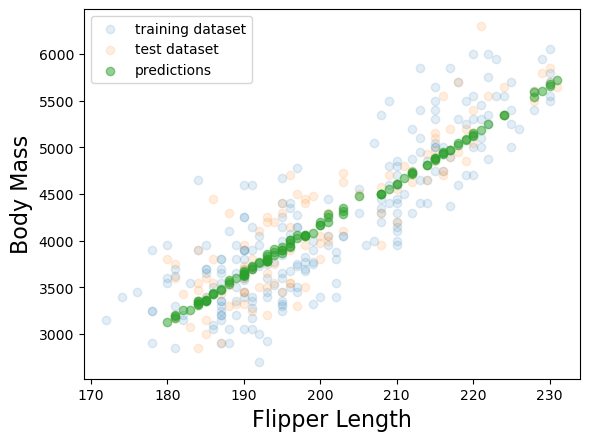

In [19]:
alpha_var = 0.5

plt.scatter(X_train['flipper_length_mm'], y_train, alpha=alpha_var/4, label='training dataset')
plt.scatter(X_test['flipper_length_mm'], y_test, alpha=alpha_var/4, label='test dataset')
plt.scatter(X_test['flipper_length_mm'], predictions, alpha=alpha_var, label='predictions')
plt.ylabel('Body Mass', size=16)
plt.xlabel('Flipper Length', size=16)
plt.legend()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
np.round(r2_score(y_test, predictions),2)

0.81

# Follow Up Questions

This was a speed run, on toy data. But this shows what is possible in very few lines of code. 
- How much was the effort to collect and process the data? 
- Why did we need to split the data into testing and training datasets? 
- What issues would you have with a larger dataset? Or a grided dataset?

# Preprocessing / Data Scaling

## 5 Reasons why you want to pre-process your data:


- Scale invariance: Standardization and normalization ensure that the data is brought to a common scale, making the machine learning algorithms insensitive to the original units or magnitudes of the features.

- Improved convergence: Algorithms like gradient descent converge faster when features are standardized or normalized, as it allows the optimization process to take larger steps toward the global minimum.

- Mitigating numerical issues: Large differences in feature magnitudes can lead to numerical instability in some algorithms, causing overflow or underflow problems. Standardization and normalization prevent such issues.

- Equal influence: Without standardization or normalization, features with larger magnitudes can dominate the learning process, giving them undue importance. Standardizing the data ensures that all features contribute equally to the model's decision-making.

- Compatibility with certain algorithms: Some machine learning algorithms, such as support vector machines and k-nearest neighbors, are sensitive to feature scales. Standardization and normalization enable these algorithms to perform optimally and accurately.

<img src="Fwt9uoWaEAAqwP6.jpg" alt="Image Alt Text" width="800">

Do you need to standardize/normalize for every model type? No

Do you need to do it every time for neural network models? yes

Interesting [gist](https://gist.github.com/kwinkunks/293784bec54455a4d950ebfa289d2bd0) about scaling the target variable for regression problems. 

## Scikit Learn Pre-processors

[Here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py) is a great comparison of all the pre-processing options in scikit-learn. Today, we will focus on 3 of them.

#### Original Dataset

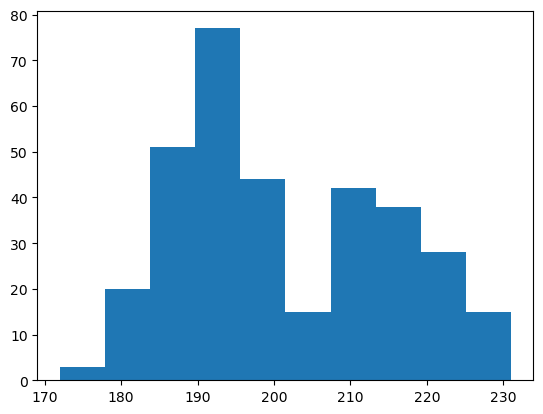

In [22]:
orginal_data = df['flipper_length_mm'].values

plt.hist(orginal_data);

### Standard Scaler 

Documentation for Standard Scaler is [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
std_scaled = scaler.fit_transform(orginal_data.reshape(-1,1), y=None)

(array([ 3., 20., 51., 77., 44., 15., 42., 38., 28., 15.]),
 array([-2.06985195, -1.64826392, -1.22667589, -0.80508786, -0.38349983,
         0.03808819,  0.45967622,  0.88126425,  1.30285228,  1.72444031,
         2.14602834]),
 <BarContainer object of 10 artists>)

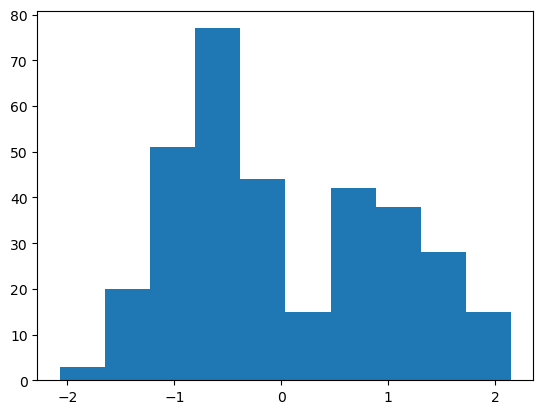

In [25]:
plt.hist(std_scaled)

What has changed? What looks the same?

### Normalizer

In [26]:
from sklearn.preprocessing import Normalizer

In [27]:
norm = Normalizer(norm='l1') # 'l1', 'l2' are also options
norm_data = norm.transform(orginal_data.reshape(1,-1))

(array([ 3., 20., 51., 77., 44., 15., 42., 38., 28., 15.]),
 array([0.00257016, 0.00265832, 0.00274648, 0.00283464, 0.00292281,
        0.00301097, 0.00309913, 0.00318729, 0.00327546, 0.00336362,
        0.00345178]),
 <BarContainer object of 10 artists>)

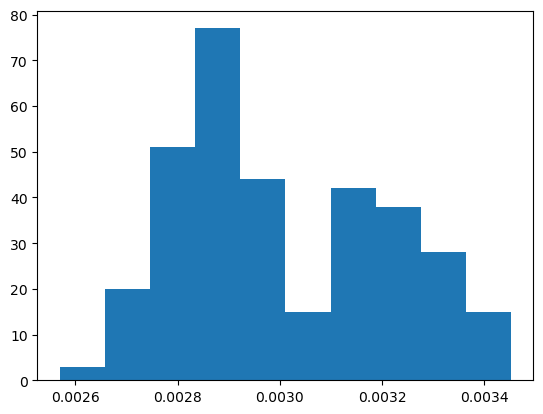

In [28]:
plt.hist(norm_data.ravel())

### Quantile Transformer

In [29]:
from sklearn.preprocessing import QuantileTransformer

In [30]:
quant_transformer = QuantileTransformer(n_quantiles=12)

In [31]:
quant_transformed = quant_transformer.fit_transform(orginal_data.reshape(-1, 1))

(array([39., 22., 34., 39., 37., 33., 33., 32., 29., 35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

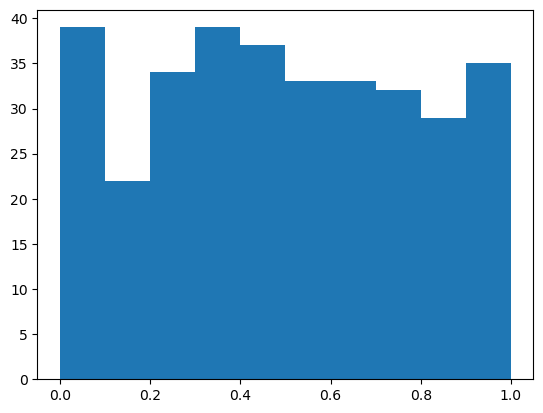

In [32]:
plt.hist(quant_transformed)

# Dataset splitting

### Why do you need a Validation set, and not just a testing set?

Testing Dataset:

- Unseen Data: The testing dataset is used to evaluate the final performance of a trained model. It contains data that the model has never seen during training or validation, simulating real-world scenarios where the model encounters new, unseen examples.

- Performance Assessment: The primary purpose of the testing dataset is to provide an unbiased and accurate estimate of the model's generalization performance. It helps determine how well the model can handle new, previously unseen data and whether it meets the desired level of performance.

- No Influence on Model Training: The testing dataset should not be used in any part of the model training process, including hyperparameter tuning or feature selection. Using the testing dataset for such purposes can lead to data leakage and overfitting, compromising the model's ability to generalize to new data.

Validation Training Set:

- Model Selection and Hyperparameter Tuning: The validation training set is an intermediate dataset used during model development. It is used to train and evaluate the model with different hyperparameter configurations or model architectures. The goal is to find the best-performing model before final evaluation on the testing dataset.

- Guarding Against Overfitting: The validation training set allows monitoring the model's performance during training and detecting overfitting. By observing the model's performance on both the training and validation sets, one can adjust the model complexity or apply regularization techniques to prevent overfitting.

- Influence on Model Training: The validation training set is used during the model selection and hyperparameter tuning process. It plays a role in the model development and optimization phase, and its performance guides decisions on how to improve the model before the final evaluation on the testing dataset.

In summary, the testing dataset serves as a final checkpoint for evaluating the model's performance on completely new data, while the validation training set is an intermediate dataset used for model development, selection, and optimization before the final evaluation. Both datasets are critical in ensuring the model's generalization and effectiveness in real-world applications.

### Why should you never test using your training dataset?

- Overfitting: When you test on the same data that you used for training, the model already "knows" the training examples and can memorize the patterns specific to the training data. This can result in overfitting, where the model performs very well on the training data but fails to generalize to new data. Essentially, the model has not learned to capture the underlying patterns but rather memorized the training samples.

- Bias in Evaluation: Testing on the training dataset can introduce bias in the evaluation process. The model has already seen these examples during training, and as a result, it may have learned specific details or noise present in the training data that may not be present in new data. Consequently, the evaluation metrics obtained from testing on the training dataset do not represent the true performance of the model on unseen data.

- Lack of Generalization Assessment: The main purpose of testing is to assess how well the model generalizes to new, unseen data. By testing on the training dataset, you miss the opportunity to gauge the model's generalization capability and may not be aware of potential issues when deploying the model in real-world scenarios.

To accurately evaluate a model's performance and generalization ability, it is essential to reserve a separate dataset (usually referred to as the testing dataset) that the model has never seen during training. This dataset acts as a fair and unbiased evaluation benchmark, providing a realistic estimate of the model's performance on new data. Using a testing dataset ensures that your model's performance assessment is more reliable and representative of its real-world effectiveness.

### Code to create Training, testing, and Validation datasets

In [33]:
# Assuming you have your features (X) and labels (y) data ready.
# X is the feature matrix, and y is the target variable.

# Split the data into 80% train and 20% test (or any other ratio you prefer).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the training data again into 80% actual training and 20% validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

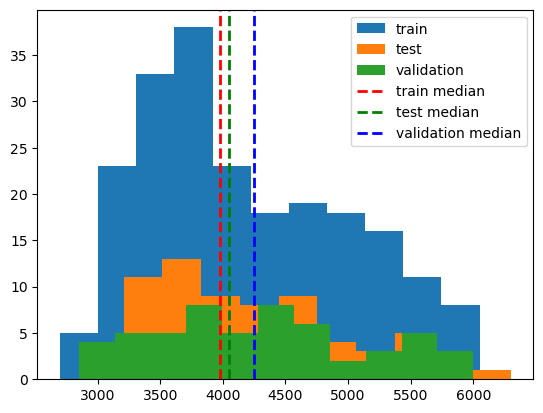

In [34]:
# Calculate the median for each dataset
median_train = np.median(y_train)
median_test = np.median(y_test)
median_val = np.median(y_val)

# Plot the histograms
plt.hist(y_train, bins=11, label='train')
plt.hist(y_test, bins=11, label='test')
plt.hist(y_val, bins=11, label='validation')

# Plot the median lines
plt.axvline(median_train, color='r', linestyle='dashed', linewidth=2, label='train median')
plt.axvline(median_test, color='g', linestyle='dashed', linewidth=2, label='test median')
plt.axvline(median_val, color='b', linestyle='dashed', linewidth=2, label='validation median')

# Add legend
plt.legend()

# Show the plot
plt.show()

What could be a problem of this splitting technique?